# **Data Wrangling Lab**


## Objectives


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [ ]:
!pip install pandas
!pip install matplotlib

## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [ ]:
# Write your code here
print(df.dtypes,'\n')
print(df.info(),'\n')
missing_values=df.isnull()
missing_values.head(5)

for column in missing_values.columns.values.tolist():
    print(missing_values[column].value_counts())
    print('')

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None 

ResponseId
False    65437
Name: count, dtype: int64

MainBranch
False    65437
Name: count, dtype: int64

Age
False    65437
Name: count, dtype: int64

Employment
False    65437
Name: count, dtype: int64

RemoteWork
False    54806
True     10631
Name: count, dtype: int64

Check
False    65437
Name: count, dtype: int64

CodingActivities
False    54466
True     10971
Name: count, dtype: int64

EdLevel
False    60784
True      4653
Name:

<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [ ]:
# Write your code here
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [ ]:
# Write your code here

# Step 1: Check unique entries in 'Country'
print("Unique country entries:")
print(df['Country'].unique())

# Step 2: Get value counts to spot typos or rare/inconsistent entries
print("\nCountry value counts (top 20):")
print(df['Country'].value_counts(dropna=False).head(20))

# Step 3: Optional — Clean entries (example fix)
# Convert all country names to title case for consistency
df['Country'] = df['Country'].str.strip().str.title()

# Recheck unique values after cleaning
print("\nUnique countries after cleaning:")
print(sorted(df['Country'].dropna().unique()))


Unique country entries:
['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhsta

<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [ ]:
## Write your code here
# Example mappings for Country
country_mapping = {
    'Usa': 'United States',
    'United States Of America': 'United States',
    'United Kingdom Of Great Britain And Northern Ireland': 'United Kingdom',
    'Uk': 'United Kingdom',
    'India ': 'India',  # remove trailing space
    'Deutschland': 'Germany',
    'Brasil': 'Brazil',
    'Russian Federation': 'Russia',
    # Add more mappings as needed
}

# Apply mapping after basic cleanup
df['Country'] = df['Country'].str.strip().str.title()
df['Country'] = df['Country'].replace(country_mapping)

# Simplified Education Level Mapping
education_mapping = {
    "Bachelor’s Degree (B.A., B.S., B.Eng., Etc.)": "Bachelor’s degree",
    "Master’s Degree (M.A., M.S., M.Eng., M.Ed., Etc.)": "Master’s degree",
    "Some College/university Study Without Earning A Degree": "Some college",
    "Professional Degree (Ph.D., Ed.D., M.D., Etc.)": "Doctoral degree",
    "Associate Degree (A.A., A.S., Etc.)": "Associate degree",
    "Secondary School (E.G. American High School, German Realschule Or Gymnasium, Etc.)": "Secondary school",
    "Primary/elementary School": "Primary school",
    # Add more if needed
}

df['EdLevel'] = df['EdLevel'].str.strip()
df['EdLevel'] = df['EdLevel'].replace(education_mapping)


### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [ ]:
## Write your code here
import pandas as pd

# Load your dataset
df = pd.read_csv('your_dataset.csv')

# Check unique values before encoding
print("Unique Employment categories:")
print(df['Employment'].unique())

# Step 1: Handle missing values if any (optional)
df['Employment'] = df['Employment'].fillna('Unknown')

# Step 2: One-hot encode the Employment column
employment_encoded = pd.get_dummies(df['Employment'], prefix='Employment')

# Step 3: Concatenate the encoded columns back to the original dataframe
df = pd.concat([df, employment_encoded], axis=1)

# Optional: Drop the original column if not needed
# df.drop('Employment', axis=1, inplace=True)

# Preview result
print(df.head())


### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [ ]:
## Write your code here
# Step 1: Calculate number and percentage of missing values per column
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

# Step 2: Combine into a DataFrame for easy viewing
missing_df = pd.DataFrame({
    'MissingValues': missing_counts,
    'PercentMissing': missing_percent
})

# Step 3: Sort by most missing
missing_df = missing_df[missing_df['MissingValues'] > 0].sort_values(by='MissingValues', ascending=False)

# Show top 10
print("Top columns with missing values:")
print(missing_df.head(10))

Top columns with missing values:
                               MissingValues  PercentMissing
AINextMuch less integrated             64289       98.245641
AINextLess integrated                  63082       96.401119
AINextNo change                        52939       80.900714
AINextMuch more integrated             51999       79.464217
EmbeddedAdmired                        48704       74.428840
EmbeddedWantToWorkWith                 47837       73.103901
EmbeddedHaveWorkedWith                 43223       66.052845
ConvertedCompYearly                    42002       64.186928
AIToolNot interested in Using          41023       62.690832
AINextMore integrated                  41009       62.669438


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [ ]:
## Write your code here
df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median())

<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [ ]:
## Write your code here
most_frequent = df['RemoteWork'].mode()[0]

# Impute missing values
df['RemoteWork'] = df['RemoteWork'].fillna(most_frequent)

### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [ ]:
## Write your code here
min_val = df['ConvertedCompYearly'].min()
max_val = df['ConvertedCompYearly'].max()
df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly'] - min_val) / (max_val - min_val)
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head())

<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


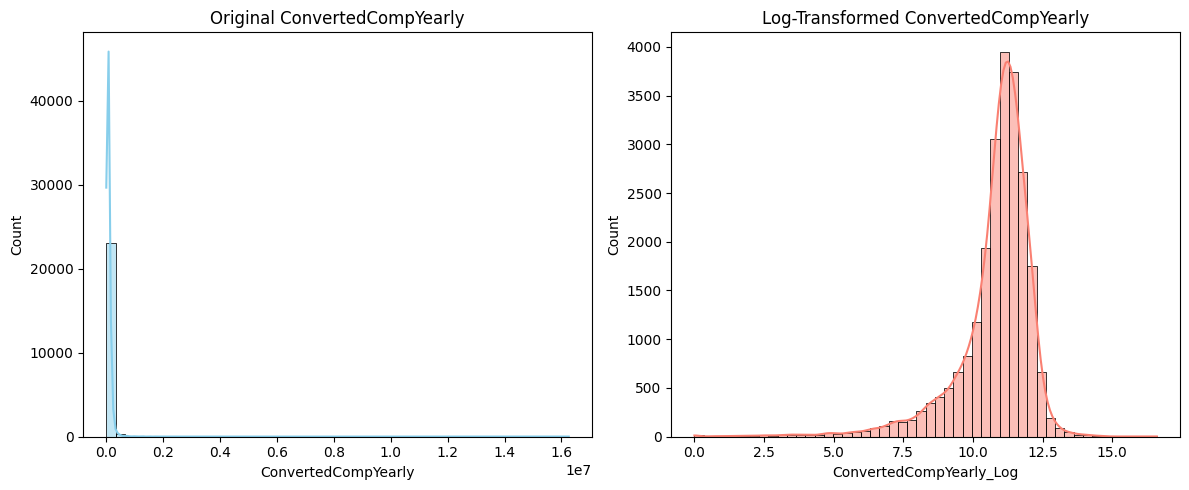

In [ ]:
## Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df['ConvertedCompYearly_Log'] = np.log(df['ConvertedCompYearly'])

# Plot original vs log-transformed
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True, color='skyblue')
plt.title('Original ConvertedCompYearly')

plt.subplot(1, 2, 2)
sns.histplot(df['ConvertedCompYearly_Log'], bins=50, kde=True, color='salmon')
plt.title('Log-Transformed ConvertedCompYearly')

plt.tight_layout()
plt.show()

### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [ ]:
## Write your code here
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('your_dataset.csv')

# Convert 'YearsCodePro' to numeric, handle special cases like 'Less than 1 year' or 'More than 50 years'
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0',
    'More than 50 years': '51'
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Create new 'ExperienceLevel' column based on years of professional coding
def map_experience_level(years):
    if pd.isnull(years):
        return 'Unknown'
    elif years <= 2:
        return 'Beginner'
    elif years <= 5:
        return 'Junior'
    elif years <= 10:
        return 'Mid-Level'
    elif years <= 20:
        return 'Senior'
    else:
        return 'Expert'

df['ExperienceLevel'] = df['YearsCodePro'].apply(map_experience_level)

# Preview result
print(df[['YearsCodePro', 'ExperienceLevel']].head())
